In [594]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.power import TTestIndPower, TTestPower
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import neighbors, datasets, preprocessing,metrics
import time
import scipy.stats as stats




# Data import/Manipulation 

In [708]:
# from kaggle this is a dataset of MyAnimeList.net of popular anime

# exporting csv file to a DataFrame only using columns listed
data = pd.read_csv("myAnimelist-No_Hentai.csv", usecols=['name','type','source','episodes','duration','rating', 'score', 'scored_by','rank','popularity','members', 'favorites'])
data_number_set = pd.read_csv("myAnimelist-No_Hentai.csv", usecols=['episodes', 'score', 'scored_by','rank','popularity','members', 'favorites'])

# dropping all null values
data.dropna(inplace = True) 


,episodes,score,scored_by,rank,popularity,members
episodes,1.000000,-0.012082,0.004470,0.029014,0.074446,0.002410
score,-0.012082,1.000000,0.405655,-0.843764,-0.687851,0.443969
scored_by,0.004470,0.405655,1.000000,-0.365773,-0.437970,0.987929
rank,0.029014,-0.843764,-0.365773,1.000000,0.823963,-0.406269
popularity,0.074446,-0.687851,-0.437970,0.823963,1.000000,-0.494001
members,0.002410,0.443969,0.987929,-0.406269,-0.494001,1.000000


In [724]:
data

,name,type,source,episodes,duration,rating,score,scored_by,rank,popularity,members,favorites
0,Cowboy Bebop,TV,Original,26,0:24:00,R - 17+ (violence & profanity),8.81,405664,26,39,795733,43460
1,Cowboy Bebop: Tengoku no Tobira,Movie,Original,1,1:55:00,R - 17+ (violence & profanity),8.41,120243,164,449,197791,776
2,Trigun,TV,Manga,26,0:24:00,PG-13 - Teens 13 or older,8.30,212537,255,146,408548,10432
3,Witch Hunter Robin,TV,Original,26,0:25:00,PG-13 - Teens 13 or older,7.33,32837,2371,1171,79397,537
4,Bouken Ou Beet,TV,Manga,52,0:23:00,PG - Children,7.03,4894,3544,3704,11708,14
5,Hachimitsu to Clover,TV,Manga,24,0:23:00,PG-13 - Teens 13 or older,8.12,57065,419,536,172274,3752
6,Hungry Heart: Wild Striker,TV,Manga,52,0:23:00,PG-13 - Teens 13 or older,7.67,9307,1186,3124,17145,210
7,Initial D Fourth Stage,TV,Manga,24,0:27:00,PG-13 - Teens 13 or older,8.23,42555,298,1262,73438,635
8,Monster,TV,Manga,74,0:24:00,R+ - Mild Nudity,8.69,131233,49,156,394387,19188
9,Naruto,TV,Manga,220,0:23:00,PG-13 - Teens 13 or older,7.90,716412,705,10,1091313,39356


### Creating Dummies for non-numerical data (for columns : Type, Source, Rating)

In [596]:
le = LabelEncoder()
# dataframe with dummies
data_le = data.copy()

# Created dummies for type column
data_le.type = le.fit_transform(data_le.type)
le.fit_transform(data_le.type)


# Made tuple for graphing labels instead of numerical data
data_list_type = ('Movie', 'Music', 'ONA', 'OVA', 'Special','TV')                           # data.type.unique()

In [597]:
# Created dummies for source column
data_le.source = le.fit_transform(data_le.source)
le.fit_transform(data_le.source)


# Made tuple for graphing labels instead of numerical data
data_list_source = ('4-koma manga', 'Book', 'Card game', 'Digital manga', 'Game', 
                    'Light novel', 'Manga', 'Music','Novel','Original', 'Other', 
                    'Picture book', 'Radio', 'Unknown', 'Visual novel','Web manga')          # data.source.unique()

In [598]:
# Created dummies for rating column
data_le.rating = le.fit_transform(data_le.rating)
le.fit_transform(data_le.rating)


# Made tuple for graphing labels instead of numerical data
data_list_rating = ('G - All Ages', 'None','PG - Children','PG-13 - Teens 13 or older',
                    'R - 17+ (violence & profanity)', 'R+ - Mild Nudity')                   # data.rating.unique()

In [599]:
data_le = data_le.drop('duration', axis = 'columns')

In [600]:
data_le

,name,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites
0,Cowboy Bebop,5,9,26,4,8.81,405664,26,39,795733,43460
1,Cowboy Bebop: Tengoku no Tobira,0,9,1,4,8.41,120243,164,449,197791,776
2,Trigun,5,6,26,3,8.30,212537,255,146,408548,10432
3,Witch Hunter Robin,5,9,26,3,7.33,32837,2371,1171,79397,537
4,Bouken Ou Beet,5,6,52,2,7.03,4894,3544,3704,11708,14
5,Hachimitsu to Clover,5,6,24,3,8.12,57065,419,536,172274,3752
6,Hungry Heart: Wild Striker,5,6,52,3,7.67,9307,1186,3124,17145,210
7,Initial D Fourth Stage,5,6,24,3,8.23,42555,298,1262,73438,635
8,Monster,5,6,74,5,8.69,131233,49,156,394387,19188
9,Naruto,5,6,220,3,7.90,716412,705,10,1091313,39356


## Correlation

In [712]:

data_le_predictors = data_le.iloc[:,1:-1]
corr= data_le_predictors.corr()
corr

,type,source,episodes,rating,score,scored_by,rank,popularity,members
type,1.000000,-0.102072,0.176927,0.098062,0.027355,0.120017,-0.050781,-0.168389,0.143874
source,-0.102072,1.000000,0.029282,-0.249729,-0.334873,-0.181637,0.390949,0.458842,-0.205016
episodes,0.176927,0.029282,1.000000,-0.109389,-0.012082,0.004470,0.029014,0.074446,0.002410
rating,0.098062,-0.249729,-0.109389,1.000000,0.330784,0.270104,-0.421295,-0.604778,0.306479
score,0.027355,-0.334873,-0.012082,0.330784,1.000000,0.405655,-0.843764,-0.687851,0.443969
scored_by,0.120017,-0.181637,0.004470,0.270104,0.405655,1.000000,-0.365773,-0.437970,0.987929
rank,-0.050781,0.390949,0.029014,-0.421295,-0.843764,-0.365773,1.000000,0.823963,-0.406269
popularity,-0.168389,0.458842,0.074446,-0.604778,-0.687851,-0.437970,0.823963,1.000000,-0.494001
members,0.143874,-0.205016,0.002410,0.306479,0.443969,0.987929,-0.406269,-0.494001,1.000000


In [713]:
corr[abs(data_le_predictors.corr() > 0.75)]

,type,source,episodes,rating,score,scored_by,rank,popularity,members
type,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
episodes,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
rating,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
score,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
scored_by,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.987929
rank,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.823963,NaN
popularity,NaN,NaN,NaN,NaN,NaN,NaN,0.823963,1.000000,NaN
members,NaN,NaN,NaN,NaN,NaN,0.987929,NaN,NaN,1.000000


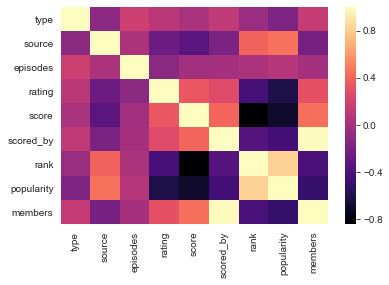

In [722]:
sns.heatmap(corr, cmap = "magma")

In [726]:
# anove = ols(data=data_le).fit()
# anova.summary()

### Checking the relationships between the different categories

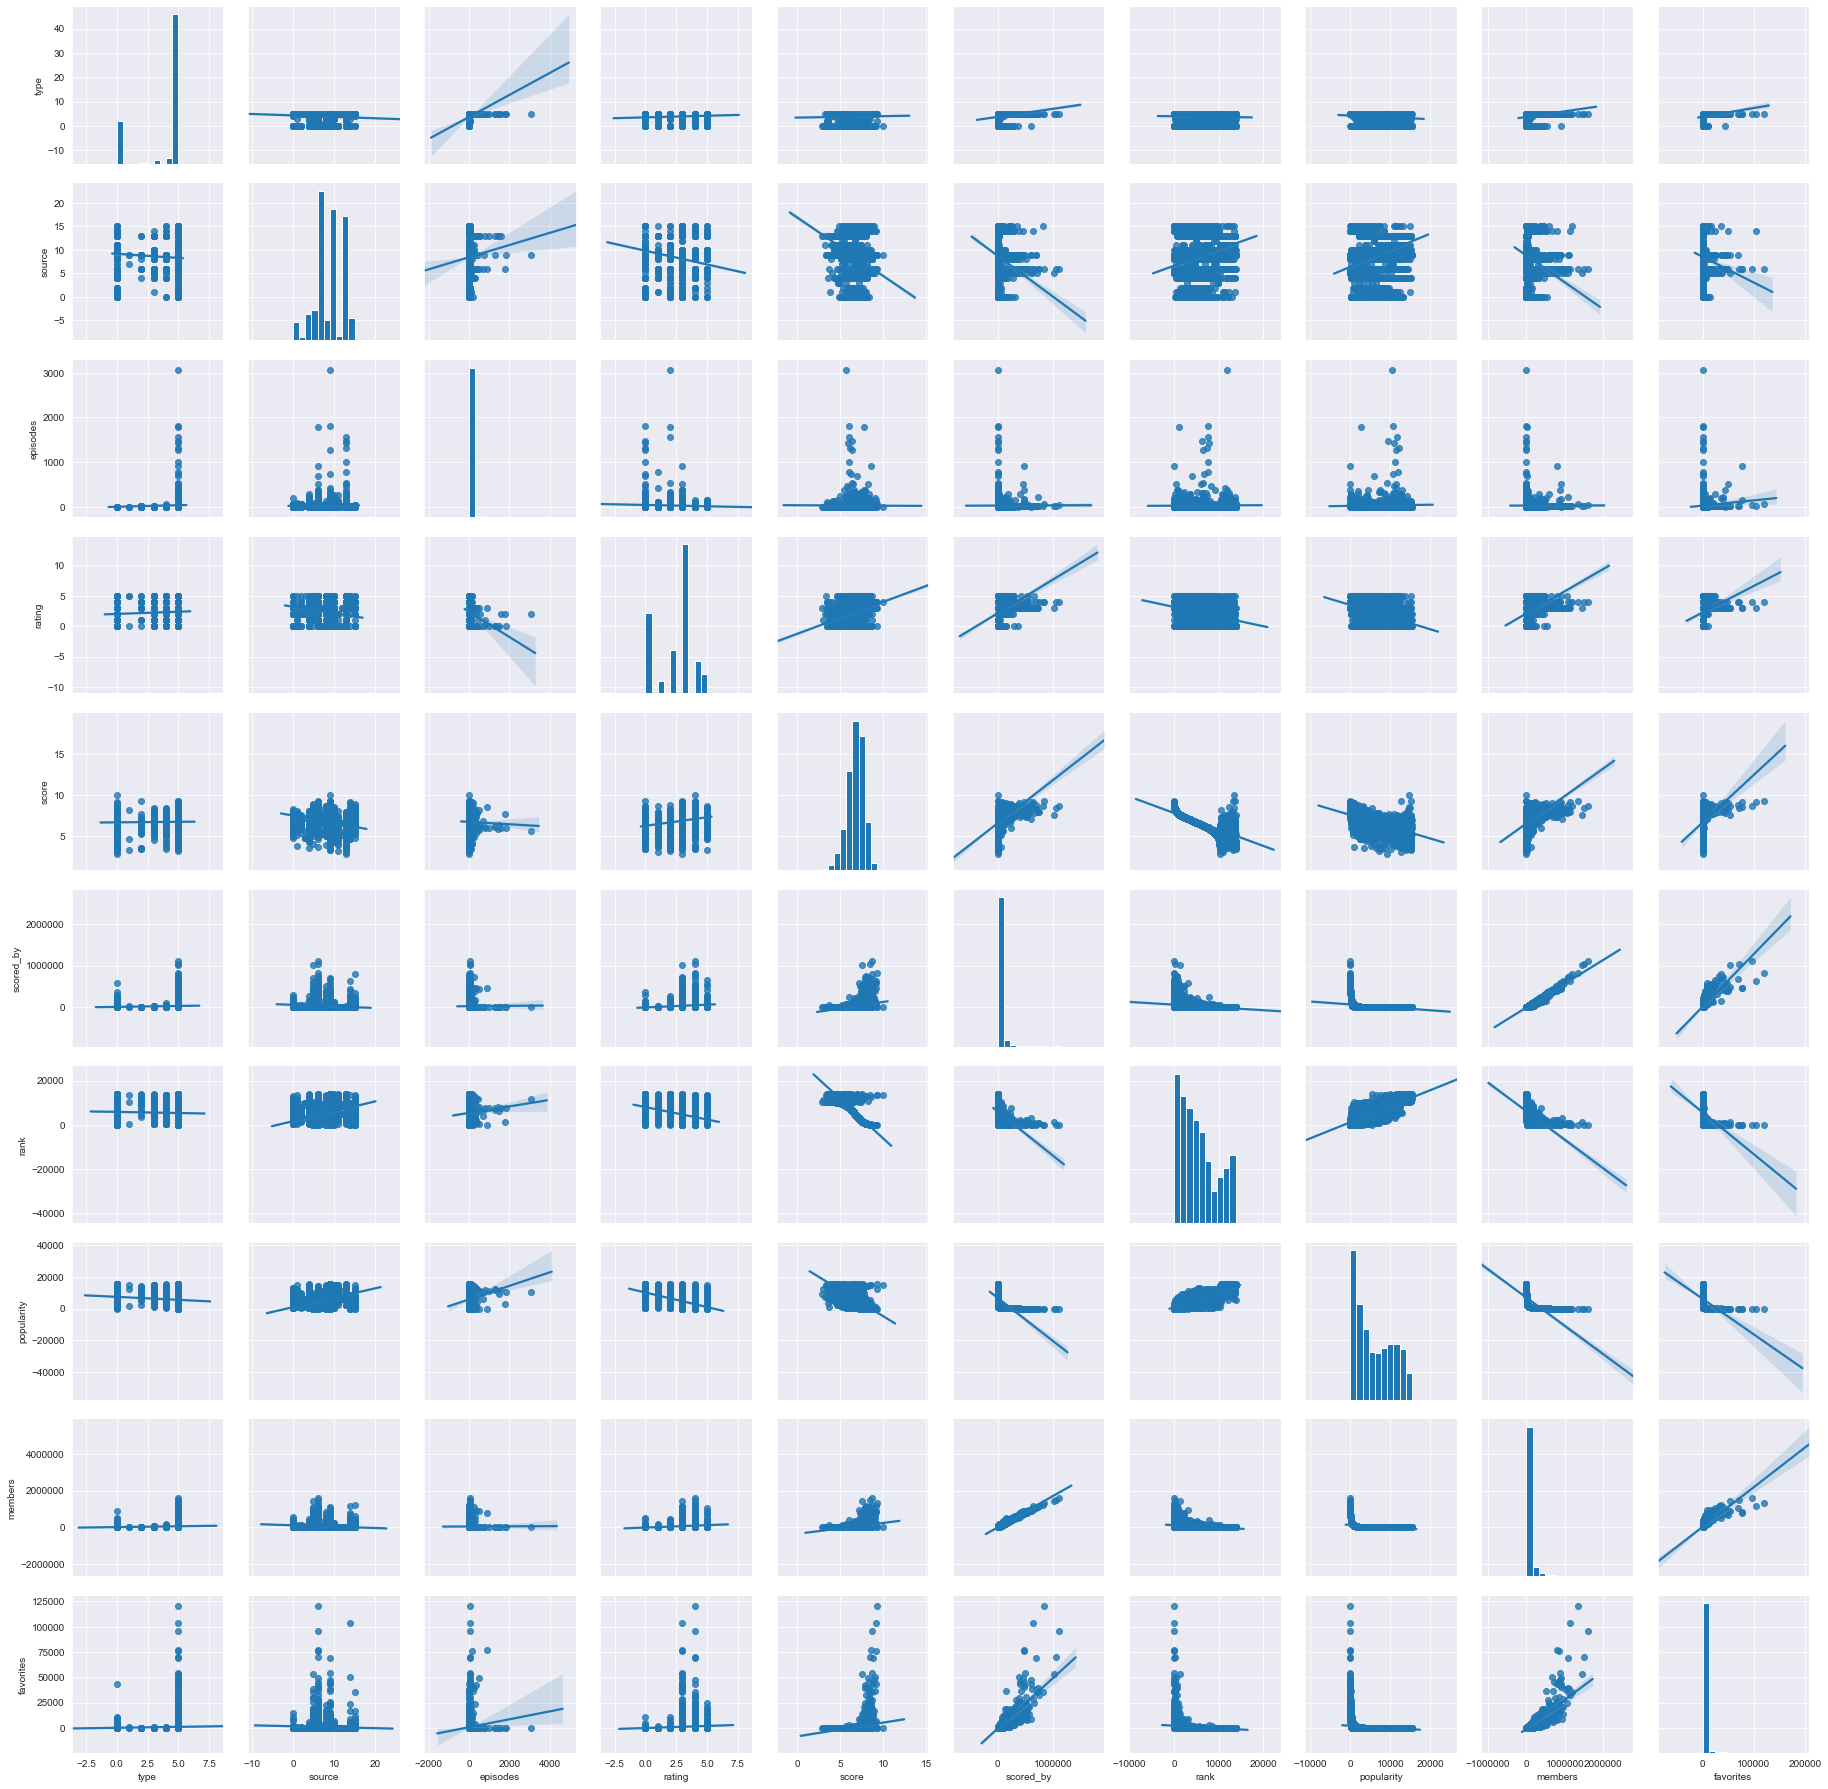

In [601]:
sns.pairplot(data_le, kind='reg' )

Visualizing relationship with each column of my dataset

//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


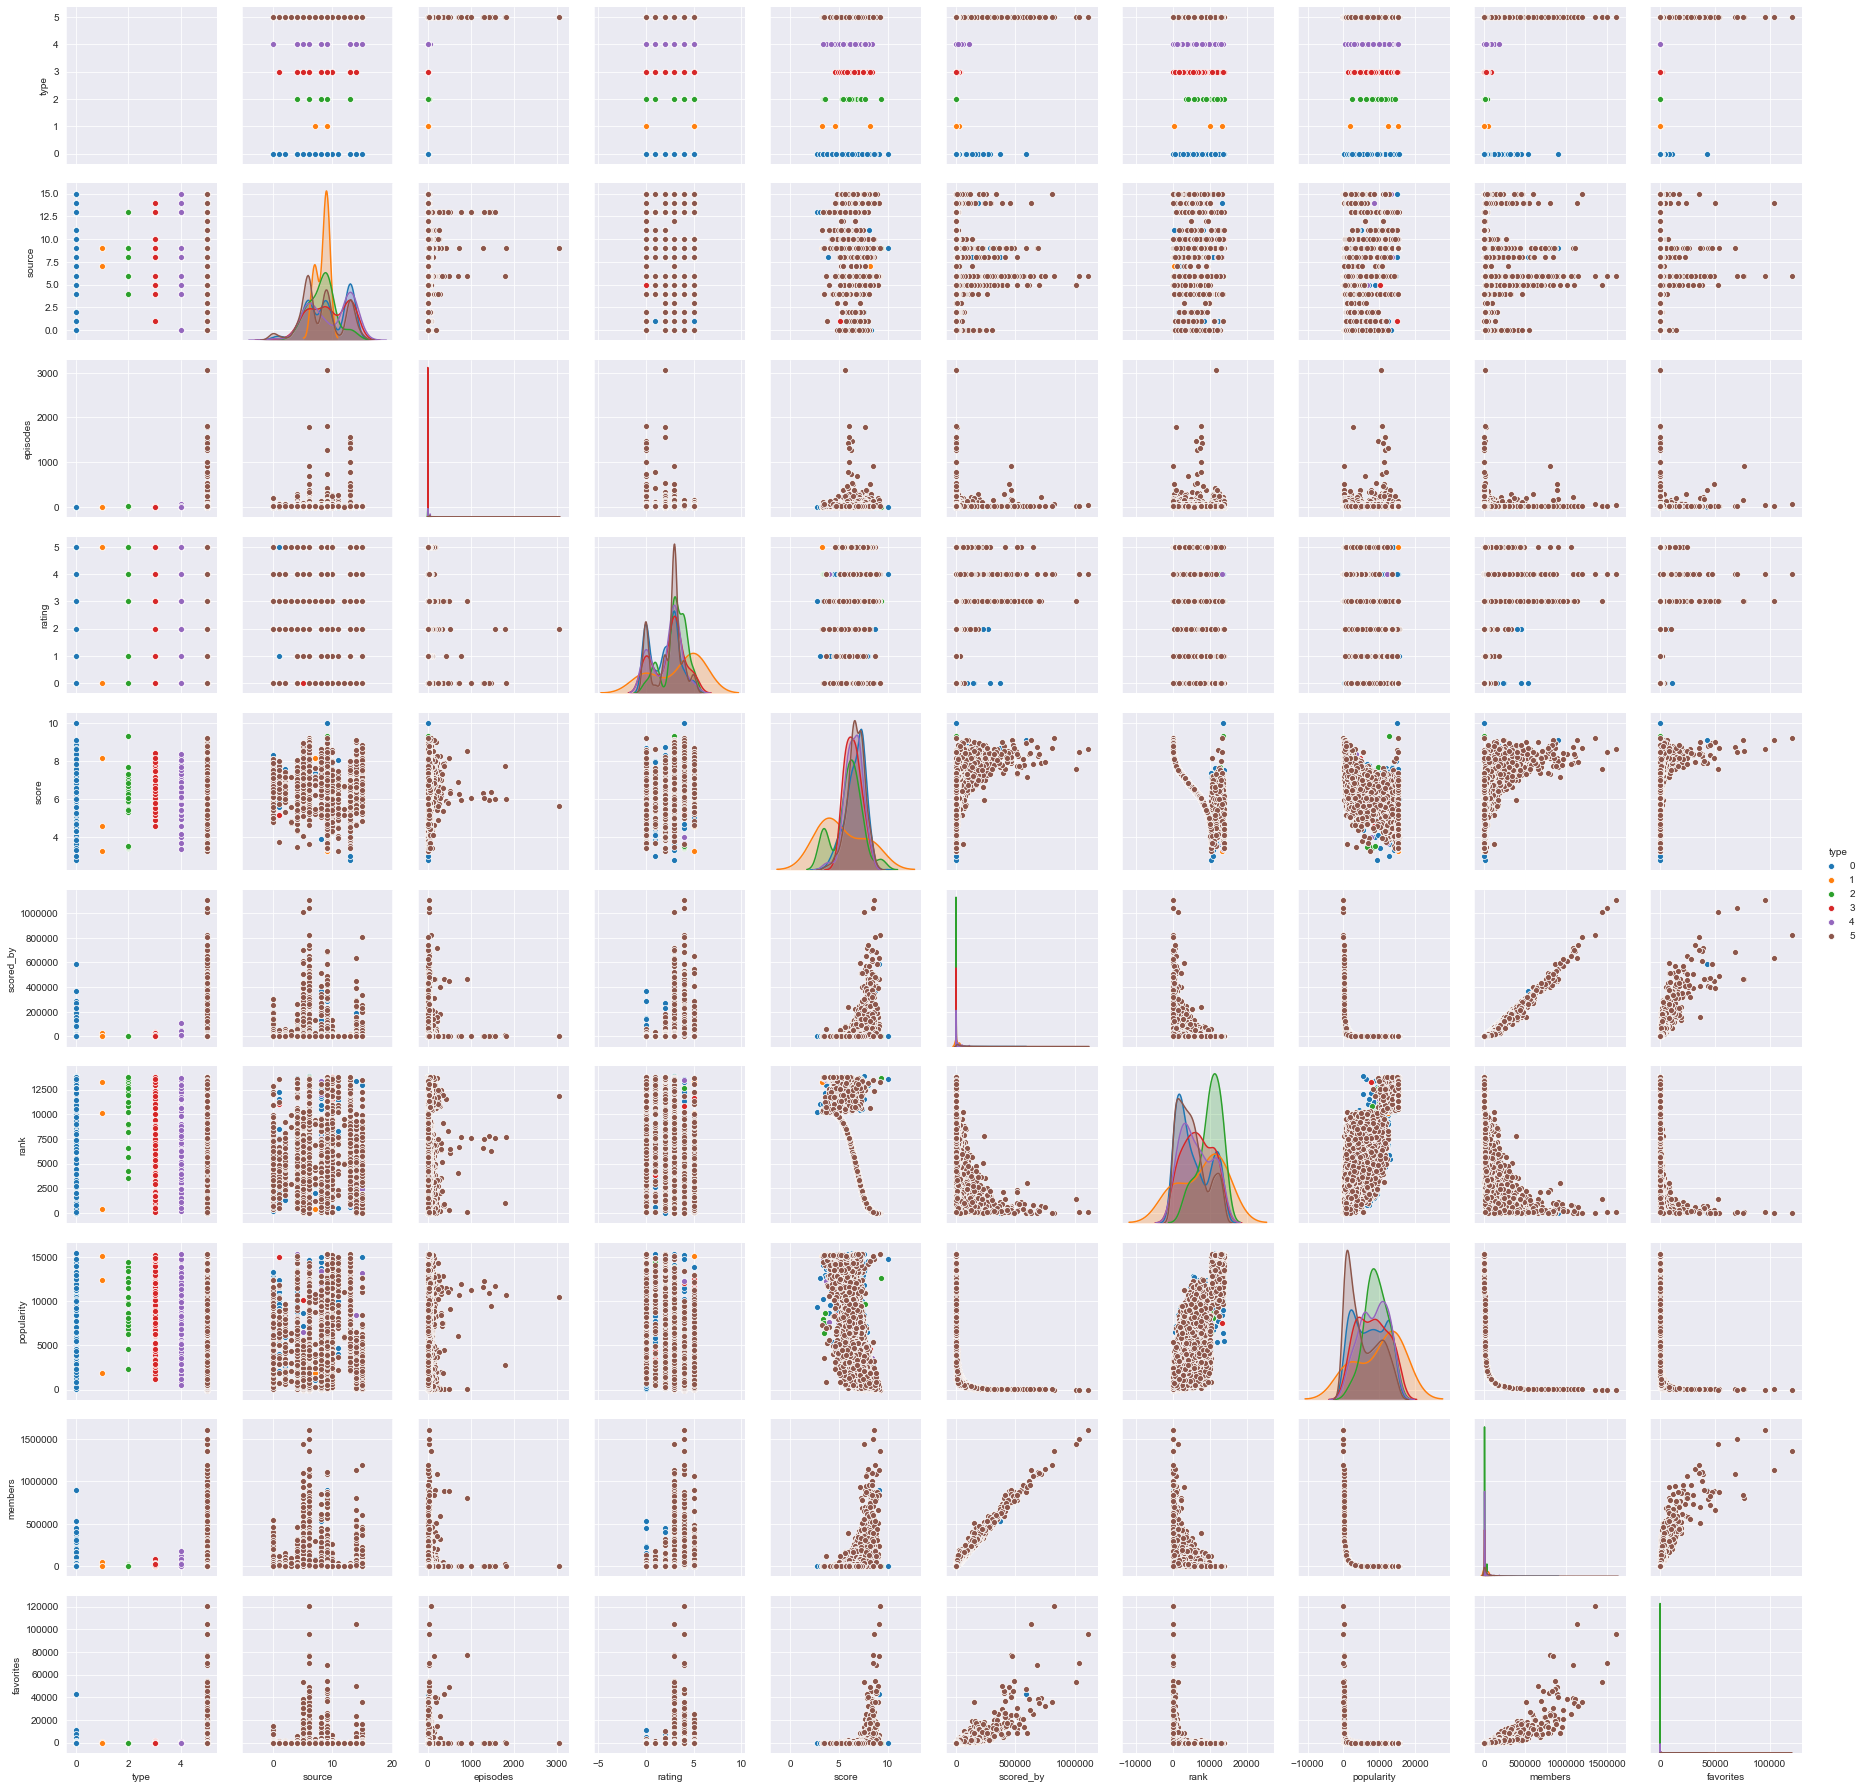

In [717]:
sns.pairplot(data_le, hue ='type')

//anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


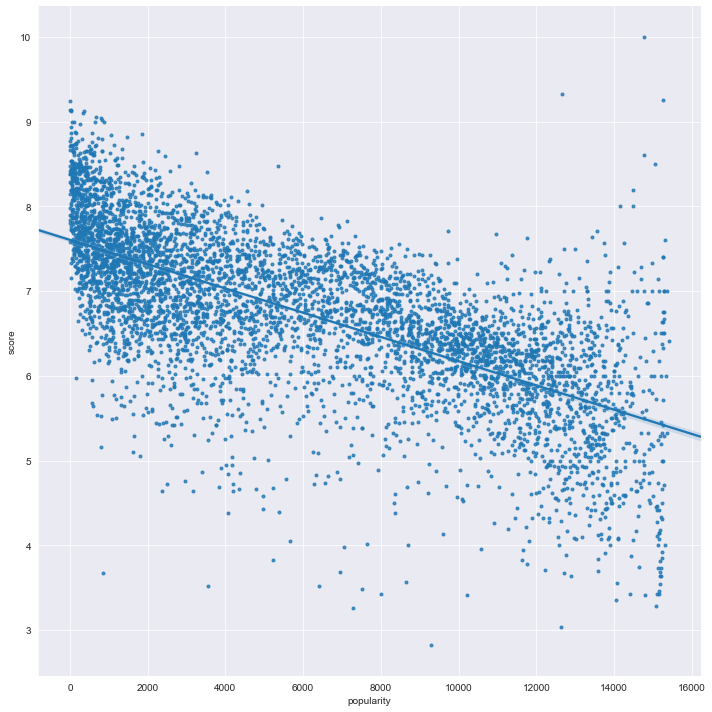

In [603]:

sns.lmplot(x='popularity', y='score', data= data, markers=[ "."], fit_reg =True,size = 10)
# sns.set(rc={'figure.figsize':(100,100)})

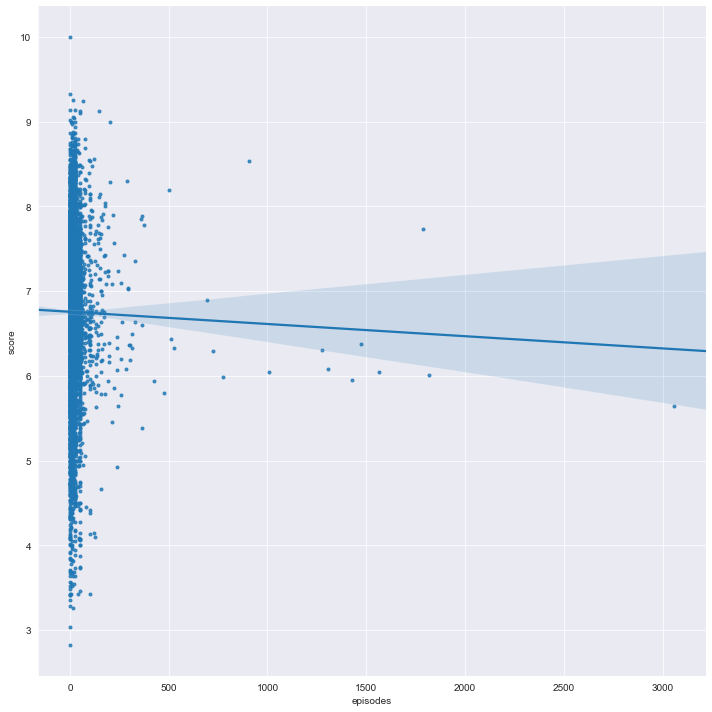

In [604]:
sns.lmplot(x='episodes', y='score', data= data, markers=[ "."], fit_reg =True,size = 10)

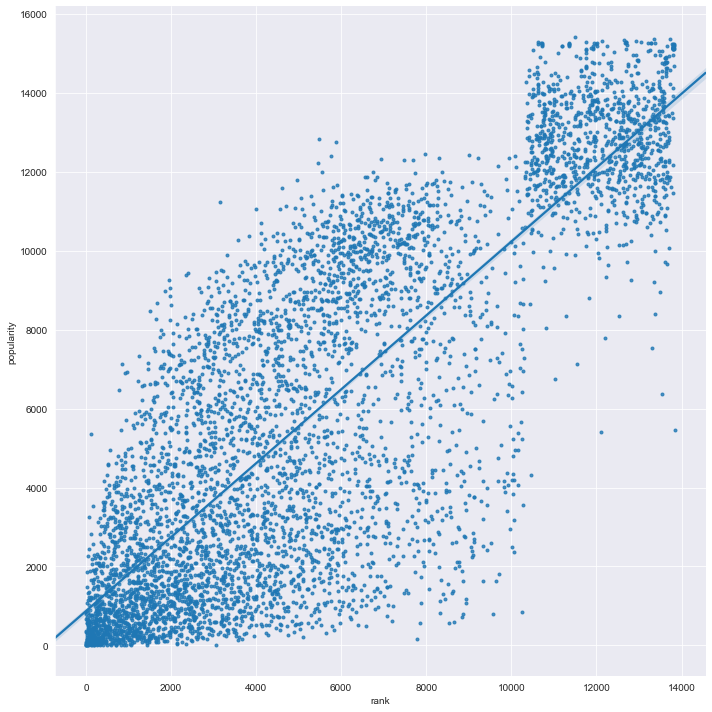

In [605]:
sns.lmplot(x='rank', y='popularity', data= data, markers=["."], fit_reg =True,size = 10)

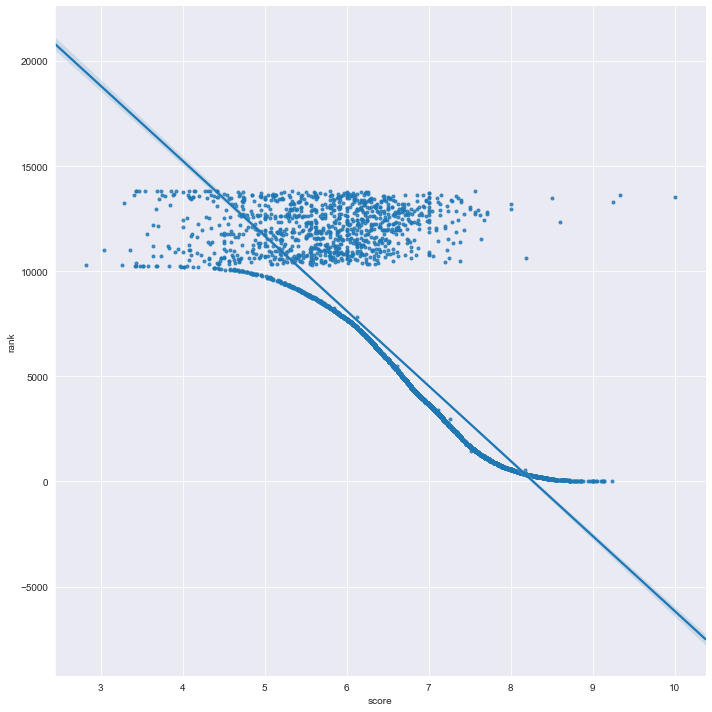

In [606]:
sns.lmplot(x='score', y='rank', data= data, markers=[ "."], fit_reg =True,size = 10)

([<matplotlib.axis.XTick at 0x1c610876d8>,
 <a list of 6 Text xticklabel objects>)

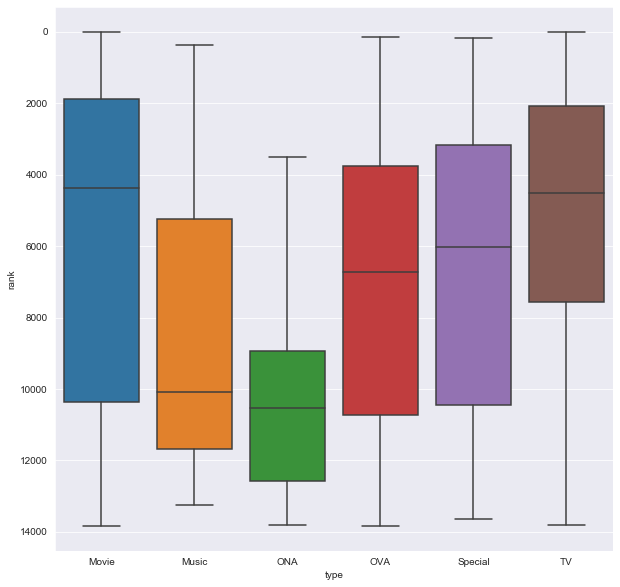

In [607]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=data_le, x='type' ,y= 'rank', orient='v')
plt.gca().invert_yaxis()
plt.xticks(np.arange(6), ('Movie', 'Music', 'ONA', 'OVA', 'Special','TV'))

([<matplotlib.axis.XTick at 0x1c610b3198>,
 <a list of 6 Text xticklabel objects>)

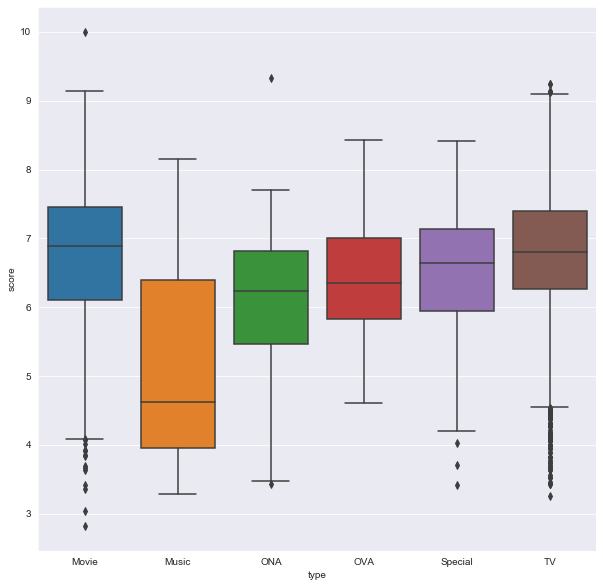

In [608]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=data_le, x='type' ,y= 'score', orient='v', )
plt.xticks(np.arange(6), ('Movie', 'Music', 'ONA', 'OVA', 'Special','TV'))

([<matplotlib.axis.XTick at 0x1c615745c0>,
 <a list of 16 Text xticklabel objects>)

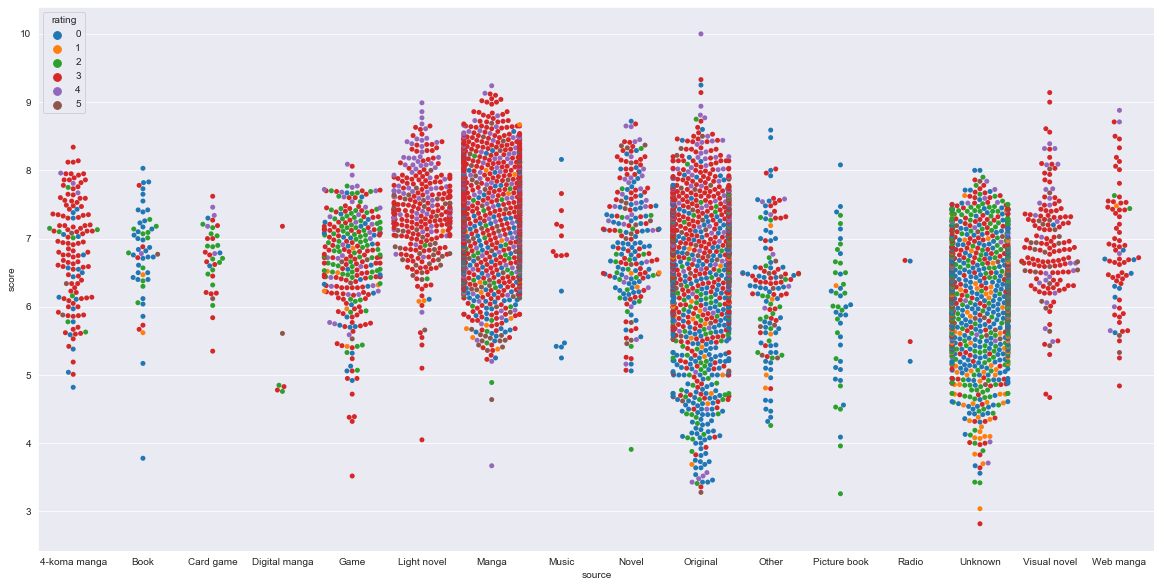

In [609]:
fig, ax = plt.subplots(figsize=(20,10))
sns.swarmplot(data=data_le, x='source' ,y= 'score', size=5, orient='v', hue='rating')
plt.xticks(np.arange(len(data_list_source)), data_list_source)


In [610]:
data.columns

Index(['name', 'type', 'source', 'episodes', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites'],
      dtype='object')

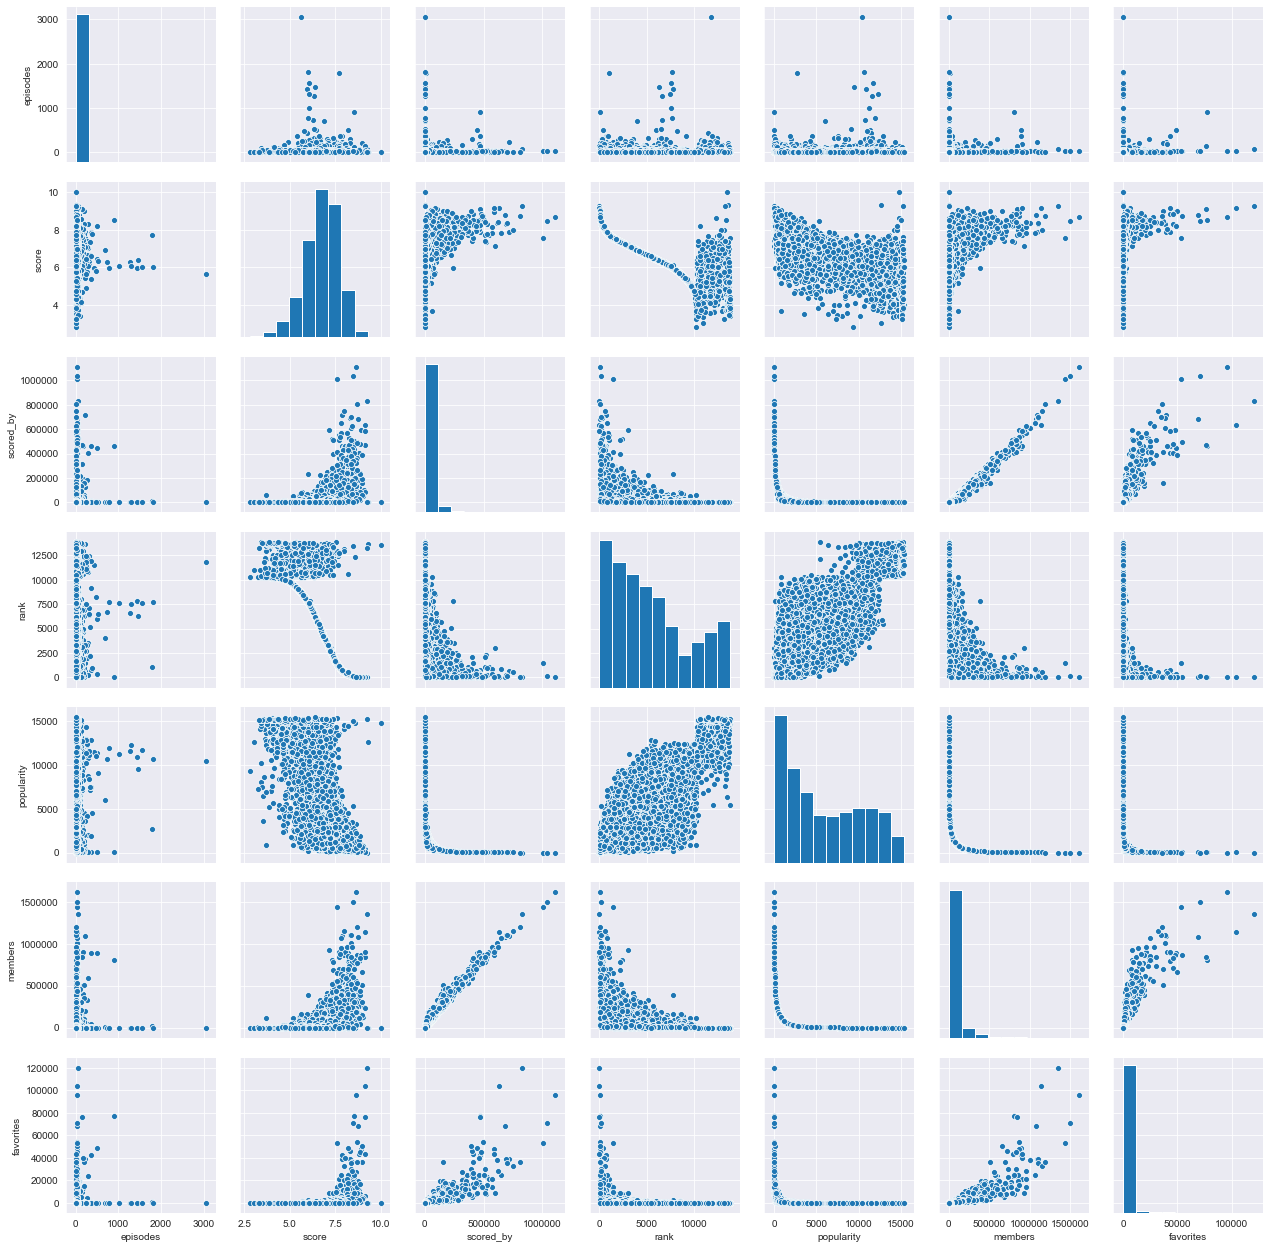

In [611]:
sns.pairplot(data_number_set)

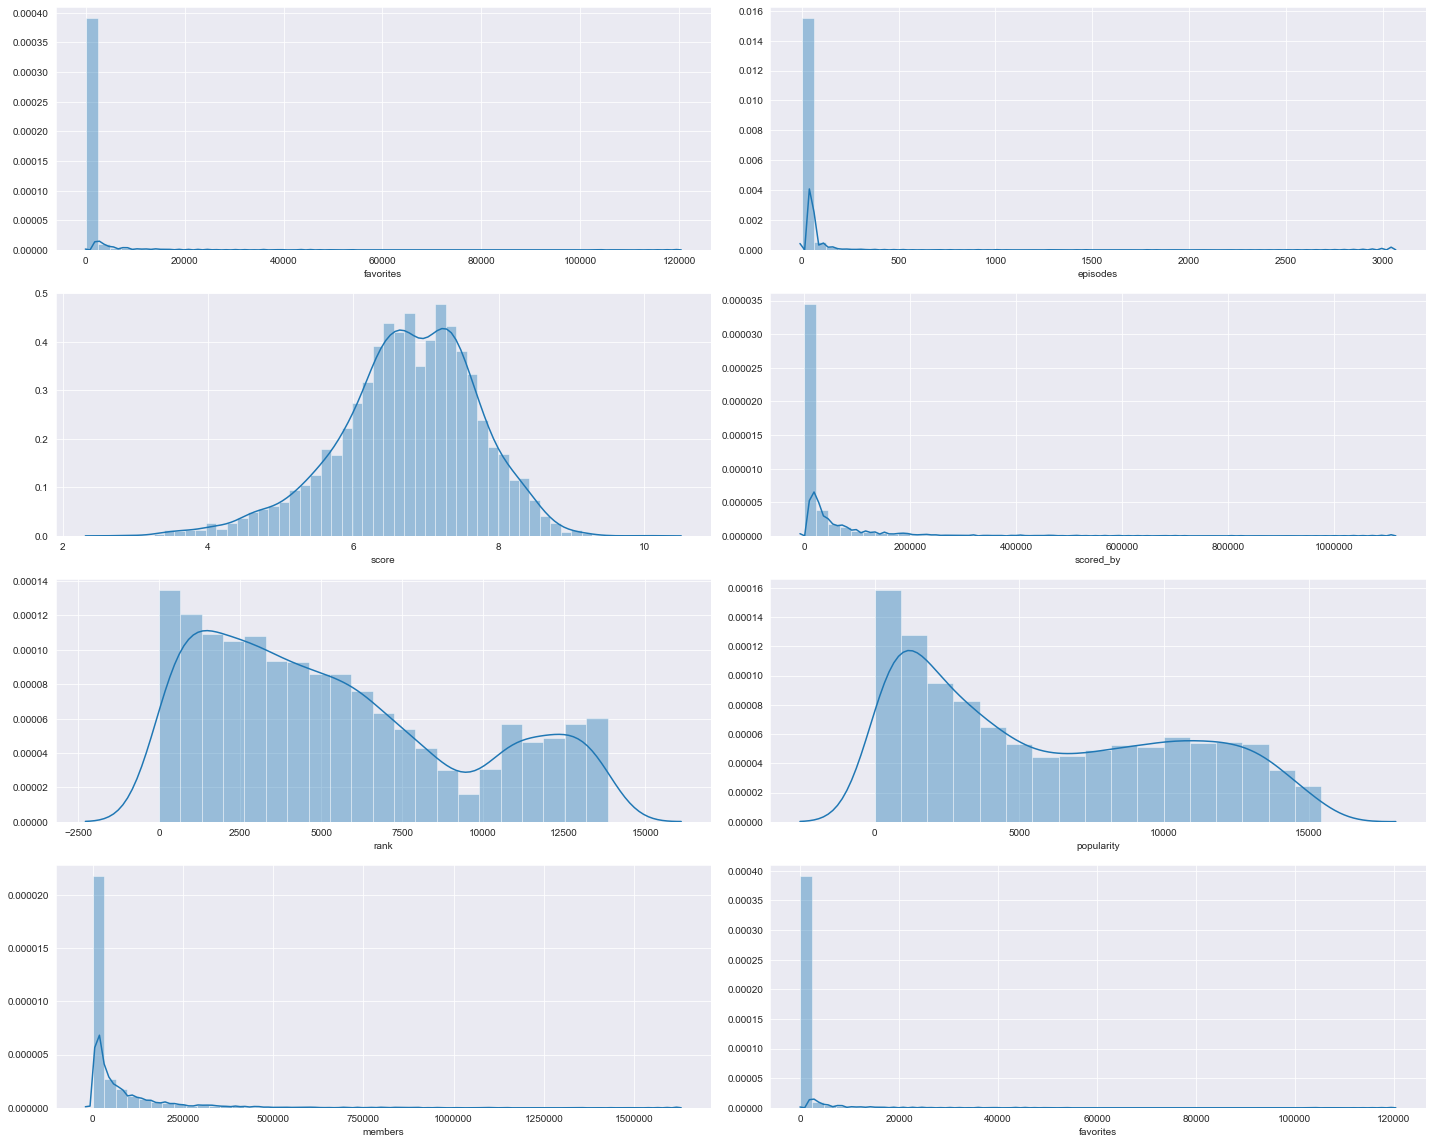

In [612]:
rows = 4
cols = 2
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (20,16))
col = data_number_set.columns
index = -1
for i in range(rows):
    for j in range(cols):
        sns.distplot(data_number_set[col[index]], ax = ax[i][j])
        index = index + 1
plt.tight_layout()

# Rank as it relates to Popularity

In [701]:
#selecting the columns in the data and labeling them 
rank=data_le.iloc[:,7]
popularity=data_le.iloc[:,8]


X1 = rank.values.reshape(-1,1)
y1 = popularity.values.reshape(-1,1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.3,random_state=1000)

# scaler = preprocessing.StandardScaler().fit(X1_train)
# X1_train = scaler.transform(X1_train)
# X1_test = scaler.transform(X1_test)



In [703]:
# K_nearest Neighbor = 1
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X1, y1)
y1_pred_knn = knn.predict(X1_test)
print(metrics.accuracy_score(y1_test,y1_pred_knn))

0.8573141486810552


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [669]:
# K_nearest Neighbor = 5 
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X1, y1)
y1_pred_knn = knn.predict(X1_test)
print(metrics.accuracy_score(y1_test,y1_pred_knn))

0.8495203836930456


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A co

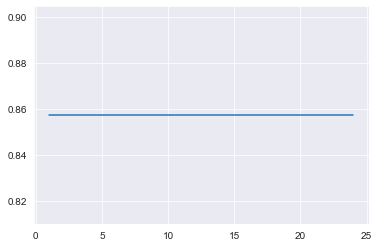

In [723]:
k_range= range(1,25)
scores= []
for k in k_range:
    kknn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X1, y1)
    y1_pred_knn = knn.predict(X1_test)
    scores.append(metrics.accuracy_score(y1_test,y1_pred_knn))
plt.plot(k_range,scores)


In [673]:
#Linear Regression
lr = LinearRegression()
lr.fit(X1,y1)
y1_pred_lr = lr.predict(X1_test)


In [675]:
#LogisticRegression
logreg= LogisticRegression()
logreg.fit(X1,y1)
y1_pred_logreg = logreg.predict(X1_test)
print(metrics.accuracy_score(y1_test,y1_pred_logreg))

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.001199040767386091


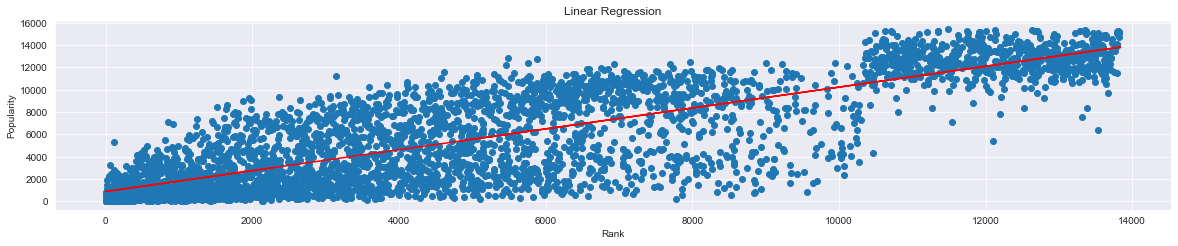

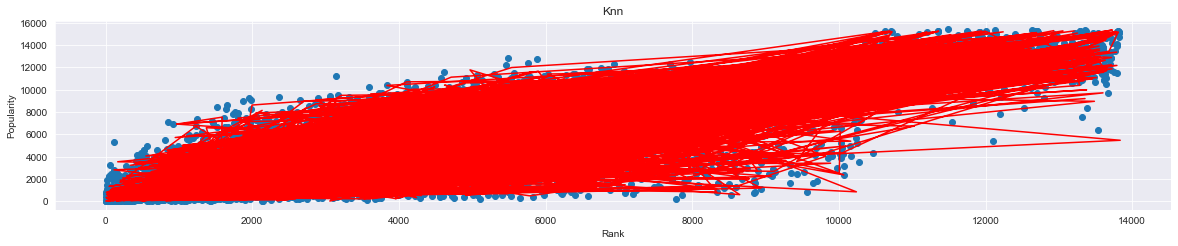

Predicted Model Log


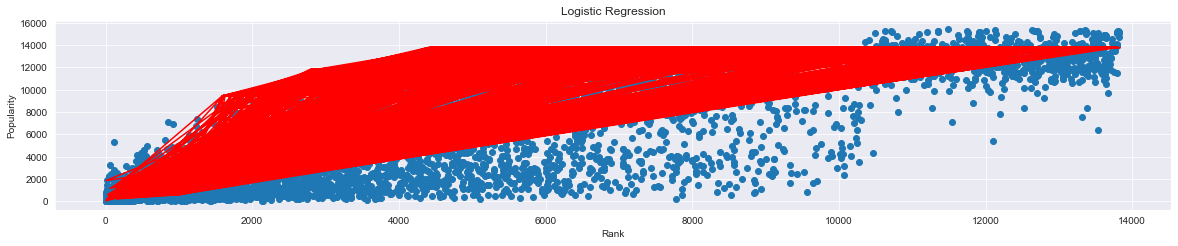

In [649]:
# ploting testing model

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(413)
plt.scatter(X1_train,y1_train)
plt.plot(X1_test,y1_pred_lr, color = 'r')
plt.xlabel('Rank')
plt.ylabel('Popularity')
plt.title('Linear Regression')
plt.show()

# ploting Knn model

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(412)
plt.scatter(X1_train,y1_train)
plt.plot(X1_test,y1_pred_knn, color = 'r')
plt.xlabel('Rank')
plt.ylabel('Popularity')
plt.title('Knn')
plt.show()


# ploting predicted model

print('Predicted Model Log')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(414)
plt.scatter(X1_train,y1_train)
plt.plot(X1_test,y1_pred_logreg, color = 'r')
plt.xlabel('Rank')
plt.ylabel('Popularity')
plt.title('Logistic Regression')
plt.show()

## Evaluating Accuracy

In [661]:

X1_logreg = metrics.accuracy_score(y1_test, y1_pred_logreg)
# X1_lr = metrics.accuracy_score(x1_test, y1_pred_lr)
X1_knn = metrics.accuracy_score(y1_test,y1_pred_knn)
                 
print(f'LogisticRegression accuracy is {X1_logreg} and K_nearest Neighbor accuracy is {X1_knn}')

# print(f'Linear Regression accuracy is {X1_lr}, LogisticRegression accuracy is {X1_logreg} and K_nearest Neighbor accuracy is {X1_knn}')

LogisticRegression accuracy is 0.001199040767386091 and K_nearest Neighbor accuracy is 0.8495203836930456



# Rank in relation to total number of scores

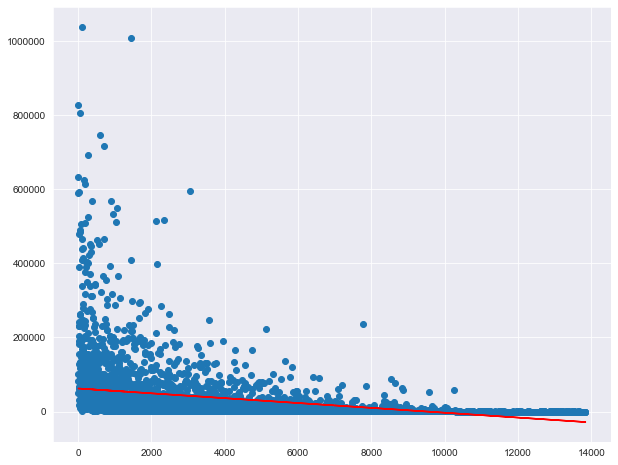

In [663]:
score_by=data.iloc[:,7]

fig2 = plt.figure(figsize=(10,8))
ax2 = fig2.add_subplot(111)
X2 = rank.values.reshape(-1,1)
y2 = score_by.values.reshape(-1,1)


X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.2)
lr.fit(X2_train,y2_train)
y2_pred = lr.predict(X2_test)


plt.scatter(X2_train,y2_train)
plt.plot(X2_test,y2_pred, color = 'r')
plt.show()

In [377]:

accuracy = lr.score(y2_test,y2_pred)
accuracy

-1.785216876087068

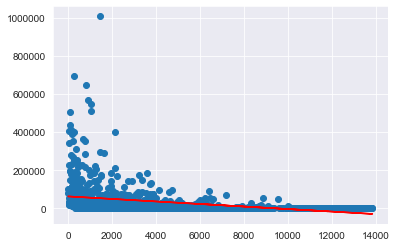

In [86]:
plt.scatter(x2_test,y2_test)
plt.plot(x2,y_pred2, color = 'r')
plt.show()

# Rank to total # of members 

In [ ]:
X1 = rank.values.reshape(-1,1)
y1 = popularity.values.reshape(-1,1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.25,)

# lr.fit(X1,y1)
# y_pred1 = lr.predict(X1_test)




lr.fit(X1_train,y1_train)
y_pred1 = lr.predict(X1_test)


lr.score(y1_test, y_pred1)


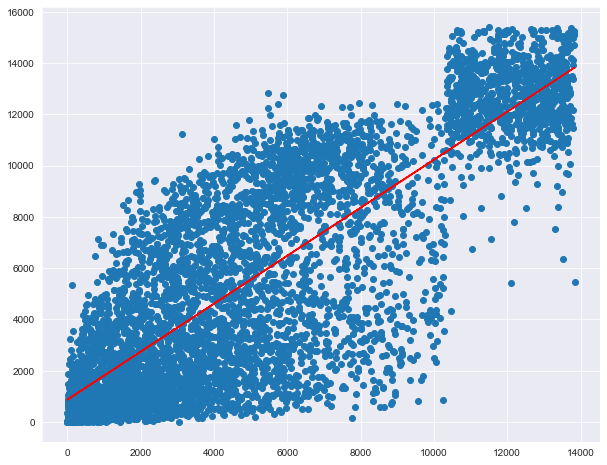

In [378]:
number_of_members = data.iloc[:,9]

fig3 = plt.figure(figsize=(10,8))
ax3 = fig3.add_subplot(111)
x3 = rank.values.reshape(-1,1)
y3 = number_of_members.values.reshape(-1,1)

lr.fit(x3,y3)
y_pred3 = lr.predict(x3)

plt.scatter(x3,y3)
plt.plot(x3,y_pred3, color = 'r')
plt.show()

In [379]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3,test_size=0.25)
lr.fit(x3_train,y3_train)
lr.predict(x3_test)
accuracy = lr.score(x3_test,y3_test)
accuracy

0.6678087485294201

# Rank to Score

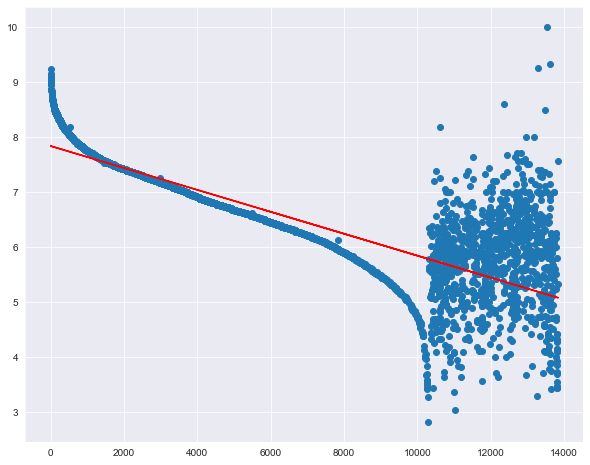

In [89]:
score=data.iloc[:,6]

fig4 = plt.figure(figsize=(10,8))
ax4 = fig4.add_subplot(111)
x4 = rank.values.reshape(-1,1)
y4 = score.values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x4,y4)
y_pred4 = lr.predict(x4)

plt.scatter(x4,y4)
plt.plot(x4,y_pred4, color = 'r')
# plt.xlim(15000,-10)
# plt.ylim(0,370000)
plt.show()

In [90]:
x4_train, x4_test, y4_train, y4_test = train_test_split(x4,y4,test_size=0.25)
lr.fit(x4_train,y4_train)
lr.predict(x4_test)
accuracy = lr.score(x4_test,y4_test)
accuracy

0.7190546320162718

In [176]:
sns.heatmap(correlated_data)

NameError: name 'correlated_data' is not defined

In [91]:
# get_Zscores(data['rank'])

In [92]:
# run_ttest(data['score'], 0.05,two_tail=True)


In [93]:
# score_mu = data['score'].mean()
# score_mu

In [ ]:
# def get_Zscores(df):
#     mu = df.mean()
#     sigma = df.std()
#     z_scores = [(df.iloc[i]-mu)/sigma for i in range(df.shape[0])]
#     return z_scores
# # Runs a one-sample t-test on data. Population_mean = mu and alpha = a.
# # Pass a bool through 'two_tail' to run a two_tail or one_tail test (True = 2 tail, False = 1 tail)
# def run_ttest(data, alpha, two_tail):
    
#     #calculate parameters
#     n = len(data)
#     s = np.std(data)
#     x_bar = np.mean(data)
#     std_err = s/np.sqrt(n)
#     mu = data.mean()

#     #Where function becomes conditional based on two-tail test or one-tail test
#     if two_tail:
#         #calculate the t-value and p-value
#         t_crit = stats.t.ppf(1-alpha/2, df=n-1)
#         t_p_values = stats.ttest_1samp(a=data, popmean=mu)
#         t = t_p_values[0]
#         p = t_p_values[1]

#         #print results of test
#         if (t>t_crit) and (p<alpha):
#             print(f'Null hypothesis rejected. Results are statistically significant since t-value: {round(t,3)} > critical t-value: {round(t_crit,3)} and p-value: {p} < alpha: {alpha}\n')
#         else:
#             print(f'Null hypothesis not rejected. Results are not statistically significant with t-value: {round(t,3)} < critical t-value: {round(t_crit,3)} and p-value: {p} > alpha: {alpha}\n')

#     else:
#         #calculate the t-value and p-value
#         t_crit = stats.t.ppf(1-alpha, df=n-1)
#         t_p_values = stats.ttest_1samp(a=data, popmean=mu)
#         t = t_p_values[0]
#         p = t_p_values[1]

#         #print results of test
#         if (t>t_crit) and (p<alpha):
#             print(f'Null hypothesis rejected. Results are statistically significant since t-value: {round(t,3)} > critical t-value: {round(t_crit,3)} and p-value: {p} < alpha: {alpha}\n')
#         else:
#             print(f'Null hypothesis not rejected. Results are not statistically significant with t-value: {round(t,3)} < critical t-value: {round(t_crit,3)} and p-value: {p} > alpha: {alpha}\n')

# # Calculates Cohen's D. Suggestion: only pass lists in as data1 and data2
# def Cohen_d(data1, data2):
    
#     #calculate parameters
#     xbar_1, xbar_2 = np.mean(data1), np.mean(data2)
#     var_1, var_2 = np.var(data1), np.var(data2)
#     n1, n2 = len(data1), len(data2)
#     var_p = ((n1-1)*var_1 + (n2-1)*var_2) / (n1+n2-2)
    
#     #calculate Cohen's D
#     d = (xbar_1 - xbar_2) / np.sqrt(var_p)
#     return d


